In [1]:
import os
import numpy as np
import pickle
import random
import time

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split

In [3]:
def read_data(file):
    '''
    Read each file into a list of strings. 
    Example:
    ["it's", 'a', 'curious', 'thing', "i've", 'found', 'that', 'when', 'willis', 'is', 'not', 'called', 'on', 
    ...'to', 'carry', 'the', 'whole', 'movie', "he's", 'much', 'better', 'and', 'so', 'is', 'the', 'movie']
    '''
    f = open(file)
    lines = f.read().split(' ')
    symbols = '${}()[].,:;+-*/&|<>=~" '
    words = map(lambda Element: Element.translate(None, symbols).strip(), lines)
    words = filter(None, words)
    return words

In [4]:
def folder_list(path,label):
    '''
    PARAMETER PATH IS THE PATH OF YOUR LOCAL FOLDER
    '''
    filelist = os.listdir(path)
    review = []
    label_list = []
    for infile in filelist:
        file = os.path.join(path,infile)
        r = read_data(file)
        review.append(r)
        label_list.append(label)
    return review,label_list


In [189]:
len(review)

1000

In [152]:
pos_path = '/Users/MuheXie/Desktop/mltest/data/pos'
neg_path = '/Users/MuheXie/Desktop/mltest/data/neg'
pos_review,pos_labels = folder_list(pos_path,1)
neg_review,neg_labels= folder_list(neg_path,-1)

In [157]:
review_both = pos_review + neg_review

In [162]:
label_both = pos_labels+neg_labels

In [168]:
Text_train, Text_test, y_train, y_test = train_test_split(review_both, label_both, test_size = 500, random_state=5)

In [170]:
pickle.dump(Text_train, open( "Text_train.p", "wb"))
pickle.dump(Text_test, open( "Text_test.p", "wb"))
pickle.dump(y_train, open( "y_train.p", "wb"))
pickle.dump(y_test, open( "y_test.p", "wb"))

In [102]:
Text_train2 = pickle.load( open( "Text_train.p", "rb" ) )
Text_test2 = pickle.load( open( "Text_test.p", "rb" ) )
y_train2 = pickle.load( open( "y_train.p", "rb" ) )
y_test2 = pickle.load( open( "y_test.p", "rb" ) )


In [103]:
Text_train2[2]

['i',
 'can',
 'see',
 'a',
 'decent',
 'sports',
 'movie',
 'struggling',
 'to',
 'break',
 'free',
 'of',
 'oliver',
 "stone's",
 '`any',
 'given',
 "sunday'",
 "it's",
 'an',
 'entertaining',
 'movie',
 'that',
 'offers',
 'both',
 'insight',
 'and',
 'excitement',
 'into',
 'the',
 'rockem',
 'sockem',
 'profession',
 'of',
 'pro',
 'football',
 'unfortunately',
 'the',
 'director',
 'seems',
 'to',
 'have',
 'only',
 'one',
 'priority',
 'on',
 'his',
 'mind',
 'sprucing',
 'up',
 'the',
 'film',
 'with',
 'an',
 'assortment',
 'of',
 'fancy',
 'camera',
 'maneuvers',
 'in',
 'altering',
 'each',
 'frame',
 'with',
 'quickflash',
 'photography',
 'and',
 'dizzying',
 'inyourface',
 'editing',
 'stone',
 'appears',
 'to',
 'have',
 'completely',
 'ignored',
 'the',
 'matter',
 'of',
 'plausible',
 'character',
 'development',
 'and',
 'football',
 'politics',
 'we',
 'see',
 'glimpses',
 'of',
 'greatness',
 'but',
 '`any',
 'given',
 "sunday'",
 'has',
 'its',
 'agenda',
 'all',
 

In [174]:
np.array_equal(np.array(Text_train),np.array(Text_train2))

True

In [175]:
np.array_equal(np.array(Text_test),np.array(Text_test2))

True

In [176]:
np.array_equal(np.array(y_test),np.array(y_test2))

True

In [177]:
np.array_equal(np.array(y_train2),np.array(y_train))

True

In [ ]:
#NO NEED THAT
# def shuffle_data():
#     '''
#     pos_path is where you save positive review data.
#     neg_path is where you save negative review data.
#     '''
#     pos_path = "/Users/drosen/Dropbox/share/ML1003-share/Homework/hw3-sentiment-analysis/release/data/neg"
#     neg_path = 

#     pos_review,pos_labels = folder_list(pos_path,1)
#     neg_review = folder_list(neg_path,-1)

#     review = pos_review + neg_review
#     random.shuffle(review)

//////////////5.1/////////////////////////////

In [25]:
def dotProduct(d1, d2):
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the dot product between d1 and d2
    """
    if len(d1) < len(d2):
        return dotProduct(d2, d1)
    else:
        return sum(d1.get(f, 0) * v for f, v in d2.items())

def increment(d1, scale, d2):
    """
    Implements d1 += scale * d2 for sparse vectors.
    @param dict d1: the feature vector which is mutated.
    @param float scale
    @param dict d2: a feature vector.

    NOTE: This function does not return anything, but rather
    increments d1 in place. We do this because it is much faster to
    change elements of d1 in place than to build a new dictionary and
    return it.
    """
    for f, v in d2.items():
        d1[f] = d1.get(f, 0) + v * scale

In [24]:
from collections import *
def convert_strlist_to_dic(word_list):
    '''
    convert a word l
    '''
    cnt = Counter()
    for word in word_list:
        cnt[word] += 1
    return cnt

In [299]:
#...... store converted things
#Text_train[0]

In [304]:
Text_train_dic_list = []
for i in range(len(Text_train)):
    Text_train_dic_list.append(convert_strlist_to_dic(Text_train[i]))

In [320]:
pickle.dump(Text_train_dic_list, open( "Text_train_dic_list.p", "wb"))

In [525]:
Text_train_dic_list2 = pickle.load( open( "Text_train_dic_list.p", "rb" ) )

In [323]:
Text_test_dic_list = []
for i in range(len(Text_test)):
    Text_test_dic_list.append(convert_strlist_to_dic(Text_test[i]))

In [324]:
pickle.dump(Text_test_dic_list, open( "Text_test_dic_list.p", "wb"))

In [526]:
Text_test_dic_list2 = pickle.load( open( "Text_test_dic_list.p", "rb" ) )

In [326]:
np.array_equal(np.array(Text_test_dic_list),np.array(Text_test_dic_list2))

True

In [327]:
np.array_equal(np.array(Text_train_dic_list),np.array(Text_train_dic_list2))

True

In [250]:
abc = convert_strlist_to_dic(np.array(['I','am','a','fat','pig','and','and']))

In [509]:
w={'minimal':1.3,'Harry':-1.1,'viable':-4.2,'and':2.2,'product':9.1,'II':100}
x={'Potter':2, 'Harry':2 ,'bb':100, 'and':3, 'II':1,'I':1.5}

In [222]:
dotProduct(w,x)

104.39999999999999

### 6 svm via pegasos

In [358]:
increment(x,-0.1,x)

In [371]:
dotProduct({},{})

0

#### 6.1

In [23]:
def rounddic(dica,number):
    for i in dica:
        dica[i] = round(dica[i],number)



In [10]:
def pegasos_algorithm(text_train_dic_list,y_train, lambda_value= 0.01, max_iter = 100,w_init ={}):
    '''
    text_train is a dic list
    '''
    step_t = 1
    w = w_init
    print "wfinish"
    num_instance = len(y_train)
    new_index = np.arange(num_instance)
    print "new_index_finish"
    start_time = time.time()
    for i in range(max_iter):
        #np.random.shuffle(new_index)
        print "shuffle time"
        print i
        for j in new_index:
            step_t = step_t+1
            eta_t = 1.0/(step_t*lambda_value)
            # print j
            if y_train[j]*dotProduct(w,text_train_dic_list[j]) < 1:
                #w = (1-eta_t*lambda_value)*w +eta_t*y_train[i]*x
                increment(w,-eta_t*lambda_value,w)
                increment(w,eta_t*y_train[j],text_train_dic_list[j])
            else:
                increment(w,-eta_t*lambda_value,w)
    #print "time = " % time.time()- start_time  
    print "time = "+ str(time.time()- start_time)
    return w
    

In [9]:
def pegasos_accelerate_algorithm(text_train_dic_list,y_train, lambda_value= 0.01, max_iter = 100,w_init ={}):
    step_t = 1
    w = w_init
    s = 1
    W = {}
    num_instance = len(y_train)
    new_index = np.arange(num_instance)
    start_time = time.time()
    for i in range(max_iter):
        #print "shuffle time"
        #print i
        np.random.shuffle(new_index)
        for j in new_index:
            step_t = step_t+1
            eta_t = 1.0/(step_t*lambda_value)
            s_before = s
            s = s*(1-eta_t*lambda_value)
            if s_before*y_train[j]*dotProduct(W,text_train_dic_list[j]) < 1:
                increment(W,(1.0/s)*eta_t*y_train[j],text_train_dic_list[j])
    
    increment(W,s-1.0,W) 
    print "time = "+ str(time.time()- start_time)
    return W
                

In [490]:
w_final = pegasos_algorithm(Text_train_dic_list,y_train,0.01,5,{})

wfinish
new_index_finish
shuffle time
0
shuffle time
1
shuffle time
2
shuffle time
3
shuffle time
4
time = 471.284276009


In [538]:
w_final2 = pegasos_accelerate_algorithm(Text_train_dic_list,y_train,0.01,5,{})

time = 1.12590479851


In [436]:
w_final3 = pegasos_algorithm(Text_train_dic_list,y_train,0.01,3,{})

wfinish
new_index_finish
shuffle time
0
shuffle time
1
shuffle time
2
time = 255.207496166


In [437]:
w_final4 = pegasos_accelerate_algorithm(Text_train_dic_list,y_train,0.01,3,{})

shuffle time
0
shuffle time
1
shuffle time
2
time = 0.671307086945


In [519]:
cmp(w_final,w_final2)

1

In [494]:
w_final_backup = w_final.copy()
w_final2_backup = w_final2.copy()

In [514]:
rounddic(w_final_backup,3)
#w_final_backup

In [501]:
rounddic(w_final2_backup,3)

In [508]:
cmp(w_final2_backup,w_final_backup)

0

### 5 test 01 loss

In [27]:
def get_zero_one_loss(text_train,y_train,w):
    predict_list = []
    num_instance = len(y_train)
    for i in range(num_instance):
        predict_list.append(dotProduct(text_train[i],w))
    result = map(lambda x,y:x*y,predict_list,y_train)
    
    return np.mean(np.sign(result)<0)

In [528]:
get_zero_one_loss(Text_train_dic_list,y_train,w_final)

0.070000000000000007

In [539]:
get_zero_one_loss(Text_train_dic_list2,y_train2,w_final2)

0.051999999999999998

In [565]:
num_iter_list = np.arange(15,56)
loss_list = np.array([1])

In [ ]:
for i in num_iter_list:
    

In [566]:
loss_list = np.zeros(len(num_iter_list))

In [561]:
len(loss_list)

40

In [567]:
for i in range(len(loss_list)):
    wtmp = pegasos_accelerate_algorithm(Text_train_dic_list,y_train,0.01,num_iter_list[i],{})
    loss_list[i] = get_zero_one_loss(Text_test_dic_list,y_test,wtmp)
    

time = 3.21605610847
time = 3.05432105064
time = 3.35276508331
time = 3.4337618351
time = 3.58180093765
time = 4.31839084625
time = 4.18763995171
time = 4.53523015976
time = 4.24645805359
time = 4.52481889725
time = 4.72859382629
time = 5.0221619606
time = 5.55785608292
time = 5.43748998642
time = 5.29699015617
time = 5.6502020359
time = 5.88743710518
time = 6.52889585495
time = 6.19838690758
time = 6.11756205559
time = 6.46362400055
time = 6.53748106956
time = 6.93938398361
time = 6.7988910675
time = 7.13361597061
time = 7.42540287971
time = 7.23935699463
time = 7.67350506783
time = 7.61298680305
time = 8.08326196671
time = 8.92513394356
time = 8.34051990509
time = 8.49721813202
time = 8.60939598083
time = 8.71077895164
time = 9.49485397339
time = 9.97669911385
time = 10.0256209373
time = 9.70266509056
time = 9.9458398819
time = 10.687128067


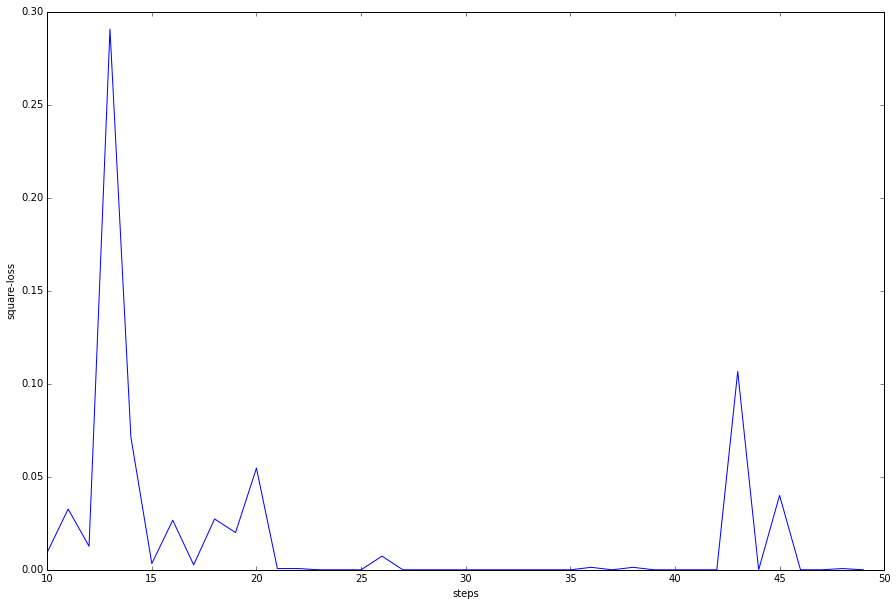

In [564]:
plt.figure(figsize = (15,10))
plt.xlabel("steps")
plt.ylabel("square-loss")
plt.plot(num_iter_list,loss_list)

plt.legend(loc="upper right")

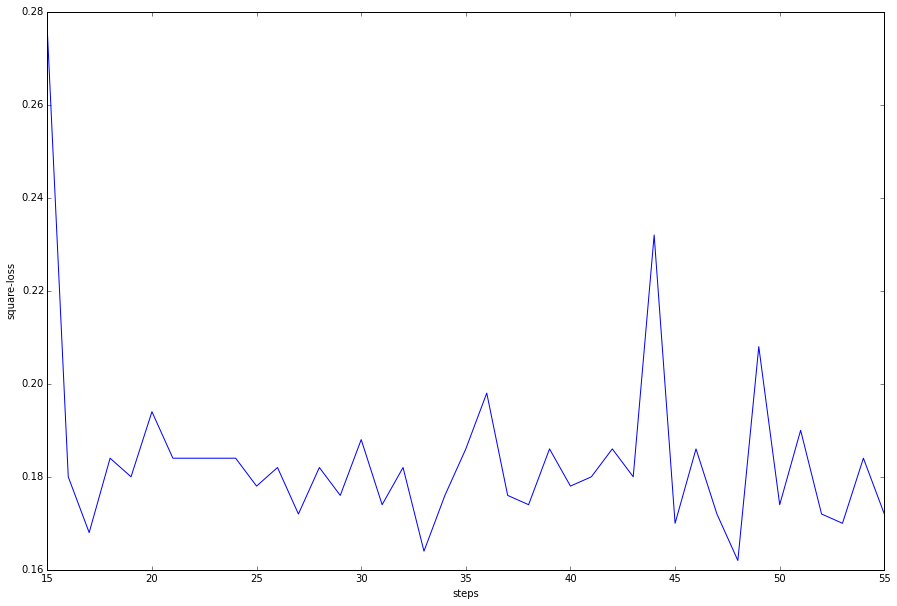

In [568]:
plt.figure(figsize = (15,10))
plt.xlabel("steps")
plt.ylabel("square-loss")
plt.plot(num_iter_list,loss_list)

plt.legend(loc="upper right")

### 6.6 search for best lambda

In [15]:
Text_train_dic_list = pickle.load(open( "Text_train_dic_list.p", "rb" ) )

In [16]:
y_train = pickle.load( open( "y_train.p", "rb" ) )

In [18]:
Text_test_dic_list = pickle.load( open( "Text_test_dic_list.p", "rb" ) )

In [20]:
y_test = pickle.load( open( "y_test.p", "rb" ) )

In [21]:
lambda_list = np.array([10**x for x in range(-8,1)])
loss_list = np.zeros(len(lambda_list))

In [31]:
for i in range(len(loss_list)):
    wtmp = pegasos_accelerate_algorithm(Text_train_dic_list,y_train,lambda_list[i],30,{})
    loss_list[i] = get_zero_one_loss(Text_test_dic_list,y_test,wtmp)

time = 9.07218909264
time = 9.08453202248
time = 8.94571208954
time = 9.1748380661
time = 8.5403418541
time = 8.58962798119
time = 8.62733507156
time = 9.60335111618
time = 12.3984510899


In [32]:
x_axis = np.arange(-8,1)
loss_list

array([ 0.168,  0.176,  0.198,  0.18 ,  0.184,  0.174,  0.158,  0.214,
        0.194])

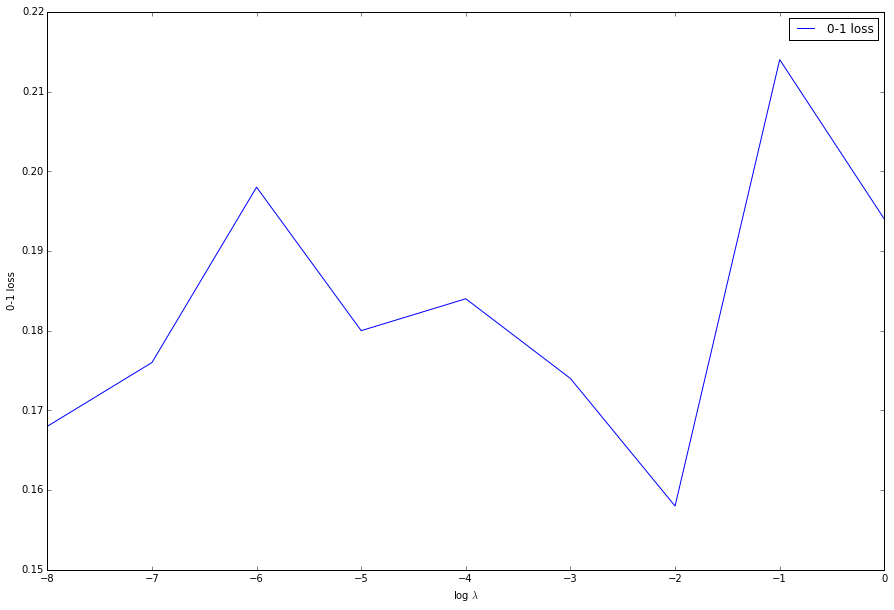

In [33]:
plt.figure(figsize = (15,10))
plt.xlabel("log $\lambda$")
plt.ylabel("0-1 loss")
plt.plot(x_axis,loss_list,label= '0-1 loss')

plt.legend(loc="upper right")
plt.savefig("loss_for_different_regularization_parameter.png")

$\lambda$ = 0.01 is the best choice

In [73]:
x_axis = np.array([0.004,0.008,0.01,0.015,0.02,0.04,0.08])

In [74]:
lambda_list = x_axis
loss_list = np.zeros(len(lambda_list))

In [75]:
for i in range(len(loss_list)):
    wtmp = pegasos_accelerate_algorithm(Text_train_dic_list,y_train,lambda_list[i],30,{})
    loss_list[i] = get_zero_one_loss(Text_test_dic_list,y_test,wtmp)

time = 8.36516499519
time = 8.36137890816
time = 8.48772192001
time = 8.35778594017
time = 8.33065605164
time = 8.74463582039
time = 9.25346302986


In [76]:
loss_list

array([ 0.202,  0.172,  0.174,  0.184,  0.184,  0.176,  0.188])

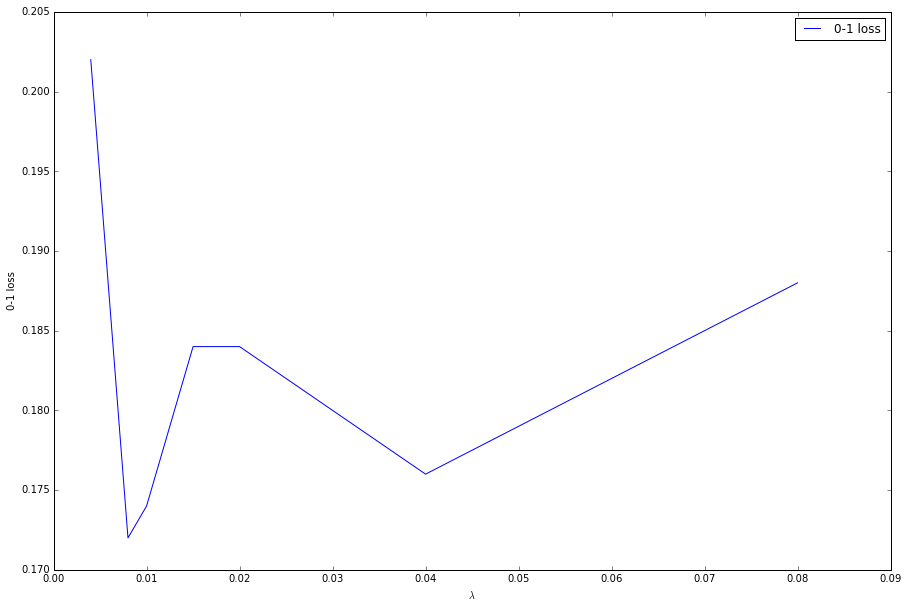

In [78]:
plt.figure(figsize = (15,10))
plt.xlabel("$\lambda$")
plt.ylabel("0-1 loss")

plt.plot(x_axis[:],loss_list[:],label= '0-1 loss')

plt.legend(loc="upper right")
plt.savefig("loss_for_different_regularization_parameter_zoom.png")

#### optional 6.8

In [79]:
def pegasos_accelerate_algorithm2(text_train_dic_list,y_train, lambda_value= 0.01, max_iter = 100,w_init ={}):
    step_t = 1
    w = w_init
    s = 1
    count0 = 0
    W = {}
    num_instance = len(y_train)
    new_index = np.arange(num_instance)
    start_time = time.time()
    for i in range(max_iter):
        #print "shuffle time"
        #print i
        np.random.shuffle(new_index)
        for j in new_index:
            step_t = step_t+1
            eta_t = 1.0/(step_t*lambda_value)
            s_before = s
            s = s*(1-eta_t*lambda_value)
            if s_before*y_train[j]*dotProduct(W,text_train_dic_list[j]) < 1:
                if(dotProduct(W,text_train_dic_list[j])) ==0:
                    count0+=1
                    
                increment(W,(1.0/s)*eta_t*y_train[j],text_train_dic_list[j])
    
    increment(W,s-1.0,W) 
    print "time = "+ str(time.time()- start_time)
    return W,count0
                

In [82]:
wtmp,ccc = pegasos_accelerate_algorithm2(Text_train_dic_list,y_train,0.08,40,{})

time = 8.44849300385


In [94]:
w_iw

{'astrosbraves': -0.0004166597223367319,
 'woods': 0.007499875002110912,
 'spiders': 0.0010416493058471588,
 'bazooms': -0.0004166597223367319,
 'hanging': 0.01333311111477542,
 'woody': -0.003749937501055456,
 'comically': 0.0004166597223367319,
 'localized': 0.003958267362207835,
 'disobeying': -0.001458309028180338,
 'hennings': -0.0016666388893469275,
 'scold': 0.00020832986116836594,
 "lucinda's": 0.0004166597223367319,
 'originality': -0.02749954167438773,
 'mutinies': 0.0004166597223367319,
 'rickman': 0.0006249895835068742,
 'slothful': 0.001458309028180338,
 'wracked': 0.0010416493058471588,
 "wood'": 0.0006249895835068742,
 "franklin's": -0.0022916284728466962,
 'stipulate': -0.0010416493058471588,
 'ambulancechaser': 0.001874968750527728,
 'rawhide': 0.008124864585568048,
 'bringing': -0.00833319444677727,
 'unsworth': -0.0016666388893469275,
 'liaisons': -0.006458225696235331,
 'grueling': 0.0008333194446734637,
 'wooden': -0.011249812503137946,
 'wednesday': 0.004791586806

### 7 error analysis

In [716]:
optimal_w =  pegasos_accelerate_algorithm(Text_train_dic_list,y_train,0.01,33,{})

time = 5.97753810883


In [717]:
def get_zero_one_loss(text_train,y_train,w):
    predict_list = []
    num_instance = len(y_train)
    for i in range(num_instance):
        predict_list.append(dotProduct(text_train[i],w))
    result = map(lambda x,y:x*y,predict_list,y_train)
    
    return np.mean(np.sign(result)<0)


In [718]:
get_zero_one_loss(Text_test_dic_list,y_test,optimal_w)

0.17199999999999999

In [719]:
def get_the_wrong_item(text_train,y_train,w):
    predict_list = []
    num_instance = len(y_train)
    for i in range(num_instance):
        predict_list.append(dotProduct(text_train[i],w))
    result = map(lambda x,y:x*y,predict_list,y_train)
    
    return result, np.mean(np.sign(result)<0)

In [720]:
wrong_items,value = get_the_wrong_item(Text_test_dic_list,y_test,optimal_w)

In [721]:
index_l = []
for i in range(len(wrong_items)):

    if wrong_items[i]<0:
        index_l.append(i)
        

In [794]:
y_test[70]

-1

In [736]:
index_l[:10]

[10, 14, 15, 25, 26, 33, 41, 43, 58, 70]

In [795]:
Text_test_dic_list[70]

Counter({'1971': 1,
         "60's": 1,
         '?': 2,
         'a': 29,
         'able': 1,
         'about': 1,
         'acid': 6,
         'activist': 1,
         'actosta': 1,
         'against': 1,
         'aggressive': 1,
         'ago': 1,
         "airplane's": 1,
         'akroyd': 1,
         'alex': 2,
         'all': 4,
         'allow': 1,
         'also': 1,
         'always': 1,
         'am': 1,
         'american': 1,
         'amidst': 1,
         'amyl': 1,
         'an': 4,
         'and': 32,
         'anyway': 1,
         'are': 5,
         'as': 11,
         'assent': 1,
         'at': 1,
         'attacked': 1,
         'attorney': 1,
         "attorney's": 1,
         'available': 1,
         'back': 1,
         'bag': 1,
         'bare': 1,
         'bathtub': 1,
         'bats': 1,
         'be': 2,
         'because': 1,
         'becomes': 1,
         'been': 4,
         'before': 1,
         'begs': 1,
         'being': 2,
         'belushi': 1,
      

In [653]:
aa = np.array(y_test)
sum(aa[index_l]<0)

53

In [780]:
dotProduct(Text_test_dic_list[25],optimal_w)

2.5070200601875285

In [781]:
wrongsample1_y = y_test[25]
wrongsample1_y

-1

In [796]:
wrongsample1 = Text_test_dic_list[14]

In [783]:
def get_the_multiply_result(w,wrong_dic_text):
    new_dic = wrong_dic_text.copy()
    for i in new_dic.keys():
        if i in w.keys():
            new_dic[i] = abs(new_dic[i]*w[i])
        else:
            new_dic[i] = 0
    return new_dic
def get_the_full_stats(sortedlist,wrong_dic_text,w):
    for i in range(len(sortedlist)):
        if sortedlist[i][0] in w:
            sortedlist[i] = (sortedlist[i][0],sortedlist[i][1],wrong_dic_text[sortedlist[i][0]],w[sortedlist[i][0]])
        else:
            sortedlist[i] = (sortedlist[i][0],sortedlist[i][1],wrong_dic_text[sortedlist[i][0]],0)

In [797]:
ddd = get_the_multiply_result(optimal_w,wrongsample3)

In [798]:
import operator

sorted_x = sorted(ddd.items(), key=operator.itemgetter(1),reverse=True)


In [799]:
sorted_x

[('and', 3.8140643623191863),
 ('then', 1.6363305791765015),
 ('on', 1.5454233247819502),
 ('see', 1.3211854305918678),
 ('to', 1.1615926950926223),
 ('the', 1.1595725338863758),
 ('work', 1.1474515666341176),
 ('in', 0.9454354457484442),
 ('you', 0.9272539948669873),
 ('will', 0.9151330276145018),
 ('as', 0.8666491586027405),
 ('have', 0.8282660956319887),
 ('but', 0.791903193872713),
 ('for', 0.7878628714552178),
 ('an', 0.7434193248627707),
 ('if', 0.7232177127734758),
 ('he', 0.6868548110142001),
 ('no', 0.684834649800905),
 ("there's", 0.6141290074920107),
 ('movie', 0.5939273954045348),
 ('up', 0.5737257833170588),
 ('are', 0.545443526393683),
 ('or', 0.5272620755131356),
 ('this', 0.5151411082606501),
 ('better', 0.49291933496351703),
 ('into', 0.49291933496351703),
 ('them', 0.48483869012670766),
 ('want', 0.48483869012488867),
 ('they', 0.48483869012488867),
 ('a', 0.4686774004558174),
 ('point', 0.45655643320060335),
 ('while', 0.45655643320060335),
 ('with', 0.45251611078492

In [801]:
get_the_full_stats(sorted_x,wrongsample1,optimal_w)

In [802]:
sorted_x

[('and', 3.8140643623191863, 14, 0.11918951132247457),
 ('then', 1.6363305791765015, 2, -0.3272661158353003),
 ('on', 1.5454233247819502, 8, -0.17171370275355002),
 ('see', 1.3211854305918678, 0, 0.4403951435306226),
 ('to', 1.1615926950926223, 15, -0.05050403022141836),
 ('the', 1.1595725338863758, 41, 0.028282256924057947),
 ('work', 1.1474515666341176, 0, -0.2868628916585294),
 ('in', 0.9454354457484442, 11, 0.07878628714570368),
 ('you', 0.9272539948669873, 1, 0.30908466495566245),
 ('will', 0.9151330276145018, 0, 0.30504434253816726),
 ('as', 0.8666491586027405, 5, 0.07878628714570368),
 ('have', 0.8282660956319887, 1, -0.16565321912639774),
 ('but', 0.791903193872713, 2, 0.09898789923408913),
 ('for', 0.7878628714552178, 5, -0.13131047857586964),
 ('an', 0.7434193248627707, 5, -0.18585483121569268),
 ('if', 0.7232177127734758, 0, -0.3616088563867379),
 ('he', 0.6868548110142001, 2, 0.17171370275355002),
 ('no', 0.684834649800905, 0, -0.22827821660030168),
 ("there's", 0.614129007

In [808]:
y_test[14]

1

In [804]:
sums = 0
for i in range(len(sorted_x)):
    sums += sorted_x[i][2]*sorted_x[i][3]
sums

0.6545322316687816

In [807]:
#pickle.dump(sorted_x, open( "wrongsample3.p", "wb"))
pickle.dump(-1, open( "wrongsample2_true_y.p", "wb"))

In [97]:
tmpy = pickle.load( open( "wrongsample3_true_y.p", "rb" ) )
tmpy

-1

In [87]:
tmp = pickle.load( open( "wrongsample1.p", "rb" ) )

In [88]:
tmp1

[('and', 1.668653158514644, 14, 0.11918951132247457),
 ('on', 1.3737096220284002, 8, -0.17171370275355002),
 ('american', 1.3575483323547815, 6, 0.22625805539246358),
 ('the', 1.1595725338863758, 41, 0.028282256924057947),
 ('version', 1.0888668915786184, 7, -0.15555241308265977),
 ('bad', 0.9555362517930917, 1, -0.9555362517930917),
 ('an', 0.9292741560784634, 5, -0.18585483121569268),
 ('in', 0.8666491586027405, 11, 0.07878628714570368),
 ('original', 0.8363467404706171, 3, -0.278782246823539),
 ('to', 0.7575604533212754, 15, -0.05050403022141836),
 ('l', 0.7272580351900615, 10, -0.07272580351900615),
 ('with', 0.6787741661773907, 6, 0.11312902769623179),
 ('film', 0.6727136825497837, 9, -0.07474596472775374),
 ('for', 0.6565523928793482, 5, -0.13131047857586964),
 ('then', 0.6545322316706006, 2, -0.3272661158353003),
 ('up', 0.5737257833170588, 2, -0.2868628916585294),
 ('this', 0.5151411082606501, 3, -0.17171370275355002),
 ('great', 0.5050403022141836, 1, 0.5050403022141836),
 ('e

In [98]:
tmp2 = pickle.load( open( "wrongsample3.p", "rb" ) )
tmp2

[('and', 3.8140643623191863, 14, 0.11918951132247457),
 ('then', 1.6363305791765015, 2, -0.3272661158353003),
 ('on', 1.5454233247819502, 8, -0.17171370275355002),
 ('see', 1.3211854305918678, 0, 0.4403951435306226),
 ('to', 1.1615926950926223, 15, -0.05050403022141836),
 ('the', 1.1595725338863758, 41, 0.028282256924057947),
 ('work', 1.1474515666341176, 0, -0.2868628916585294),
 ('in', 0.9454354457484442, 11, 0.07878628714570368),
 ('you', 0.9272539948669873, 1, 0.30908466495566245),
 ('will', 0.9151330276145018, 0, 0.30504434253816726),
 ('as', 0.8666491586027405, 5, 0.07878628714570368),
 ('have', 0.8282660956319887, 1, -0.16565321912639774),
 ('but', 0.791903193872713, 2, 0.09898789923408913),
 ('for', 0.7878628714552178, 5, -0.13131047857586964),
 ('an', 0.7434193248627707, 5, -0.18585483121569268),
 ('if', 0.7232177127734758, 0, -0.3616088563867379),
 ('he', 0.6868548110142001, 2, 0.17171370275355002),
 ('no', 0.684834649800905, 0, -0.22827821660030168),
 ("there's", 0.614129007

In [667]:
sorted_a = sorted(a.items(), key=operator.itemgetter(1),reverse=True)

In [676]:
sorted_a[0] = 1

In [699]:
def dsf(list23):
    list23[0] = 12 

In [759]:
sorted_x

[('and', 1.668653158514644, 14, 0.11918951132247457),
 ('on', 1.3737096220284002, 8, -0.17171370275355002),
 ('american', 1.3575483323547815, 6, 0.22625805539246358),
 ('the', 1.1595725338863758, 41, 0.028282256924057947),
 ('version', 1.0888668915786184, 7, -0.15555241308265977),
 ('bad', 0.9555362517930917, 1, -0.9555362517930917),
 ('an', 0.9292741560784634, 5, -0.18585483121569268),
 ('in', 0.8666491586027405, 11, 0.07878628714570368),
 ('original', 0.8363467404706171, 3, -0.278782246823539),
 ('to', 0.7575604533212754, 15, -0.05050403022141836),
 ('l', 0.7272580351900615, 10, -0.07272580351900615),
 ('with', 0.6787741661773907, 6, 0.11312902769623179),
 ('film', 0.6727136825497837, 9, -0.07474596472775374),
 ('for', 0.6565523928793482, 5, -0.13131047857586964),
 ('then', 0.6545322316706006, 2, -0.3272661158353003),
 ('up', 0.5737257833170588, 2, -0.2868628916585294),
 ('this', 0.5151411082606501, 3, -0.17171370275355002),
 ('great', 0.5050403022141836, 1, 0.5050403022141836),
 ('e

## ##last proble. 8 features

In [109]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [206]:
Text_train2?

In [114]:
a = Text_train2[2]
len(a)

561

In [119]:
c=""
for i in a:
    
    c+=i
    c+=" "

In [122]:
c

"i can see a decent sports movie struggling to break free of oliver stone's `any given sunday' it's an entertaining movie that offers both insight and excitement into the rockem sockem profession of pro football unfortunately the director seems to have only one priority on his mind sprucing up the film with an assortment of fancy camera maneuvers in altering each frame with quickflash photography and dizzying inyourface editing stone appears to have completely ignored the matter of plausible character development and football politics we see glimpses of greatness but `any given sunday' has its agenda all tangled in technical gobbledygook it grows tiresome and monotonous yes stone has pulled a brian depalma matters of importance are pushed aside right from the getgo tony d'amato al pacino coach of the struggling miami sharks finds his team stuck in a losing rut aging quarterback cap rooney dennis quaid appears to be losing his touch and d'amato can't seem to ignite any passion in his sq

In [127]:
c[:-1]

"i can see a decent sports movie struggling to break free of oliver stone's `any given sunday' it's an entertaining movie that offers both insight and excitement into the rockem sockem profession of pro football unfortunately the director seems to have only one priority on his mind sprucing up the film with an assortment of fancy camera maneuvers in altering each frame with quickflash photography and dizzying inyourface editing stone appears to have completely ignored the matter of plausible character development and football politics we see glimpses of greatness but `any given sunday' has its agenda all tangled in technical gobbledygook it grows tiresome and monotonous yes stone has pulled a brian depalma matters of importance are pushed aside right from the getgo tony d'amato al pacino coach of the struggling miami sharks finds his team stuck in a losing rut aging quarterback cap rooney dennis quaid appears to be losing his touch and d'amato can't seem to ignite any passion in his sq

In [125]:
count_vectorizer = CountVectorizer(binary=False,ngram_range=(1,2),stop_words='english')

In [129]:
X = count_vectorizer.fit_transform([c])

In [130]:
X

<1x535 sparse matrix of type '<type 'numpy.int64'>'
	with 535 stored elements in Compressed Sparse Row format>

In [108]:
len(count_vectorizer.get_feature_names)

TypeError: object of type 'instancemethod' has no len()

In [132]:
len(count_vectorizer.get_feature_names())

535

In [134]:
a = [' I AM not OK, BUT FIne transpose ','this is am I transpose hap']

In [135]:
count_vectorizer = CountVectorizer(binary=False,ngram_range=(1,1),stop_words='english')

In [141]:
X = count_vectorizer.fit_transform(a)

In [140]:
count_vectorizer.get_feature_names()

[u'fine',
 u'fine transpose',
 u'hap',
 u'ok',
 u'ok fine',
 u'transpose',
 u'transpose hap']

In [143]:

X.toarray()

array([[1, 1, 0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1]])

In [146]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()

In [148]:
tfidf = transformer.fit_transform(X.toarray())

In [151]:
tfidf.toarray()

array([[ 0.47107781,  0.47107781,  0.        ,  0.47107781,  0.47107781,
         0.33517574,  0.        ],
       [ 0.        ,  0.        ,  0.6316672 ,  0.        ,  0.        ,
         0.44943642,  0.6316672 ]])

In [161]:
Text_train2 = pickle.load( open( "Text_train.p", "rb" ) )
Text_test2 = pickle.load( open( "Text_test.p", "rb" ) )
y_train2 = pickle.load( open( "y_train.p", "rb" ) )
y_test2 = pickle.load( open( "y_test.p", "rb" ) )

In [155]:
len(Text_test2)

500

In [172]:
Text_train2[2][2]
Text_train_text_string_list = []
Text_test_text_string_list = []

In [164]:
for i in Text_train2[2]:
   # print i

IndentationError: expected an indented block (<ipython-input-164-3711d954b3e7>, line 2)

In [173]:
Text_train_text_string_list = []
for i in range(len(Text_train2)):
    s=""
    for JJ in Text_train2[i]:
        s+=JJ
        s+=" "
    s = s[:-1]
    Text_train_text_string_list.append(s)
    

In [187]:
Text_test_text_string_list = []
for i in range(len(Text_test2)):
    s=""
    for JJ in Text_test2[i]:
        s+=JJ
        s+=" "
    s = s[:-1]
    Text_test_text_string_list.append(s)

In [191]:
len(Text_train_text_string_list)

1500

In [193]:
Text_test_text_string_list[-1]

"i feel sorry for the financial backers of waterworld which is supposedly the most expensive film ever made at 172 million ! and is also one of the stupidest boy did they get ripped off ! in fact this film is not really a movie but more of an amusement park ride with a plot it's not even just another case of cliches strung together well it is that too it's something that's painful to watch because it relishes in its flaws kevin costner stars as a man who is some kind of mutant half manhalf fish he is an explorermariner on an alternate earth that is completely covered by water because the polar ice caps melted he's referred to as the mariner but they the meaner would have been a more appropriate title because he's cold rigid and strict and he's supposed the be the good guy ! he docks at a small floating village of sorts he trades dirt for money and this introduces us to the other important characters first we meet one of the villains then the soontobe heroine a child prodigy a wacky inv

In [183]:
len(Text_train2[-1])

412

In [194]:
len(Text_train_text_string_list[-1])

2319

In [202]:
Count_vectorizer = CountVectorizer(binary=False,ngram_range=(1,2),stop_words='english')

In [203]:
train_text_X = Count_vectorizer.fit_transform(Text_train_text_string_list)

In [204]:
train_text_X

<1500x419525 sparse matrix of type '<type 'numpy.int64'>'
	with 820258 stored elements in Compressed Sparse Row format>

In [270]:
#tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1),stop_words='english')
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1),stop_words='english')
tfidf_vectorizer.fit(Text_train_text_string_list)
X_train_tfidf = tfidf_vectorizer.transform(Text_train_text_string_list)
X_test_tfidf = tfidf_vectorizer.transform(Text_test_text_string_list)

In [259]:
count_vectorizer = CountVectorizer(binary=True,ngram_range=(1,1),stop_words='english')
count_vectorizer.fit(Text_train_text_string_list)
X_train_count = count_vectorizer.transform(Text_train_text_string_list)
X_test_count = count_vectorizer.transform(Text_test_text_string_list)

In [230]:
y_train2 = pickle.load( open( "y_train.p", "rb" ) )
y_test2 = pickle.load( open( "y_test.p", "rb" ) )

In [271]:
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
my_svm = svm.SVC(kernel='linear',probability=True)
my_svm.fit(X_train_tfidf,y_train2 )
#my_svm.fit(X_train_count,y_train2 )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [272]:
#predict_result = my_svm.predict(X_test_tfidf)
predict_result = my_svm.predict(X_test_tfidf)

In [273]:
wrong_item_num =0
for i in range(len(predict_result)):
    if predict_result[i]!= y_test2[i]:
        wrong_item_num +=1

In [274]:
wrong_item_num

77

$\sqrt{p (1-p)}$